<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/agglomerative_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `Agglomerative Clustering`

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. See the Wikipedia page for more details.

The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

- **Ward** minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

- **Maximum or complete linkage** minimizes the maximum distance between observations of pairs of clusters.

- **Average linkage** minimizes the average of the distances between all observations of pairs of clusters.

- **Single linkage** minimizes the distance between the closest observations of pairs of clusters.

This model can also scale to large number of samples when it is used jointly with a connectivity matrix, but is computationally expensive when no connectivity constraints are added between samples: it considers at each step all the possible merges.

#### **Example: Body Height Dataset**

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# style
plt.style.use('ggplot')

# warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset body height
url = 'https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/tinggibadan.csv'
data = pd.read_csv(url, delimiter=';')
data.head()

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181


In [3]:
# Renaming columns
data = data.rename(columns={'tinggibadan':'BodyHeight', 'tinggibadanistri':'Wife_BodyHeight'})
data.head()

,BodyHeight,Wife_BodyHeight
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181


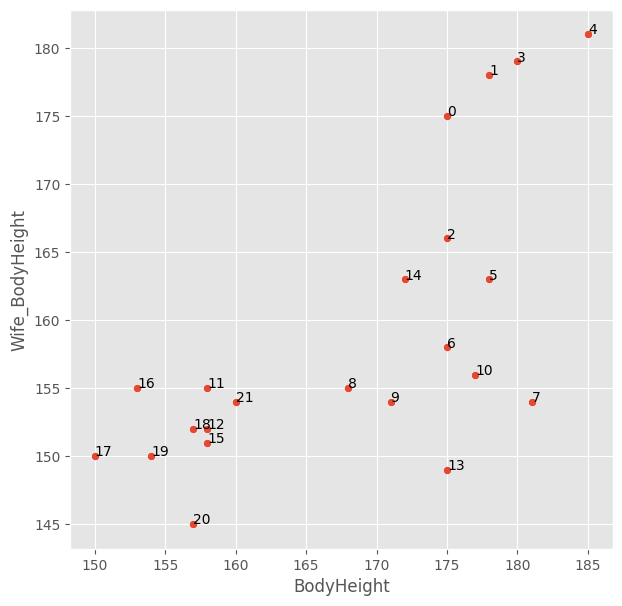

In [4]:
# scater plt
plt.figure(figsize=(7,7))

sns.scatterplot(data=data, x='BodyHeight',y='Wife_BodyHeight')
for i in range(len(data)):
    plt.annotate(i,(data['BodyHeight'][i],data['Wife_BodyHeight'][i]))

plt.show()

#### **Building an Aglomerative Clustering using** `Scipy`

A dendrogram is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. The main use of a dendrogram is to work out the best way to allocate objects to clusters.

Now, we will make Aglomerative Clustering using Scipy.

In [5]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import ward, complete, average
from scipy.cluster.hierarchy import fcluster

from sklearn.preprocessing import MinMaxScaler


X = data
scaler = MinMaxScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)



`Ward`
- Calculate the smallest variance between 2 cluster

In [6]:
linkage_ward = ward(X_scaled)

linkage_ward.round(1)

array([[12. , 15. ,  0. ,  2. ],
       [18. , 22. ,  0. ,  3. ],
       [11. , 21. ,  0.1,  2. ],
       [ 1. ,  3. ,  0.1,  2. ],
       [ 6. , 10. ,  0.1,  2. ],
       [ 8. ,  9. ,  0.1,  2. ],
       [17. , 19. ,  0.1,  2. ],
       [ 2. ,  5. ,  0.1,  2. ],
       [23. , 24. ,  0.1,  5. ],
       [14. , 29. ,  0.2,  3. ],
       [16. , 28. ,  0.2,  3. ],
       [ 0. , 25. ,  0.2,  3. ],
       [ 7. , 26. ,  0.2,  3. ],
       [13. , 27. ,  0.3,  3. ],
       [20. , 32. ,  0.3,  4. ],
       [ 4. , 33. ,  0.3,  4. ],
       [30. , 36. ,  0.3,  9. ],
       [34. , 35. ,  0.4,  6. ],
       [31. , 39. ,  0.5,  9. ],
       [37. , 40. ,  1.4, 13. ],
       [38. , 41. ,  2.2, 22. ]])

**Interpretation**

- distance from 2 clusters to 1 cluster = 2.2 - 1.4 = 0.8
- distance from 3 clusters to 2 clusters = 1.4 - 0.5 = 0.9 (This is the furthest difference, meaning the optimum number of clusters is 3)
- distance from 4 clusters to 3 clusters = 0.5 - 0.4 = 0.1

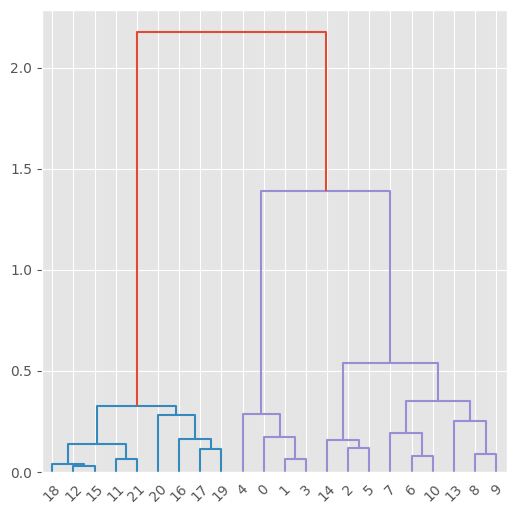

In [7]:
plt.figure(figsize=(6,6))
dendrogram(linkage_ward)

plt.show()

In [8]:
labels = fcluster(linkage_ward, 3, criterion='maxclust')
print(f'cluster : {labels}' )

cluster : [2 2 3 2 2 3 3 3 3 3 3 1 1 3 3 1 1 1 1 1 1 1]


`Complete`
- Calculate the distance between the furthest data points of 2 clusters

In [9]:
linkage_complete = complete(X_scaled)

linkage_complete.round(2)

array([[1.20e+01, 1.50e+01, 3.00e-02, 2.00e+00],
       [1.80e+01, 2.20e+01, 4.00e-02, 3.00e+00],
       [1.10e+01, 2.10e+01, 6.00e-02, 2.00e+00],
       [1.00e+00, 3.00e+00, 6.00e-02, 2.00e+00],
       [6.00e+00, 1.00e+01, 8.00e-02, 2.00e+00],
       [8.00e+00, 9.00e+00, 9.00e-02, 2.00e+00],
       [2.30e+01, 2.40e+01, 1.10e-01, 5.00e+00],
       [1.70e+01, 1.90e+01, 1.10e-01, 2.00e+00],
       [2.00e+00, 5.00e+00, 1.20e-01, 2.00e+00],
       [1.60e+01, 2.90e+01, 1.60e-01, 3.00e+00],
       [1.40e+01, 3.00e+01, 1.70e-01, 3.00e+00],
       [0.00e+00, 2.50e+01, 1.80e-01, 3.00e+00],
       [7.00e+00, 2.60e+01, 2.00e-01, 3.00e+00],
       [1.30e+01, 3.40e+01, 2.50e-01, 4.00e+00],
       [2.00e+01, 2.80e+01, 2.80e-01, 6.00e+00],
       [3.10e+01, 3.60e+01, 3.10e-01, 9.00e+00],
       [4.00e+00, 3.30e+01, 3.30e-01, 4.00e+00],
       [2.70e+01, 3.20e+01, 3.70e-01, 5.00e+00],
       [3.50e+01, 3.90e+01, 4.70e-01, 9.00e+00],
       [3.70e+01, 4.00e+01, 8.90e-01, 1.80e+01],
       [3.80e+01, 4.

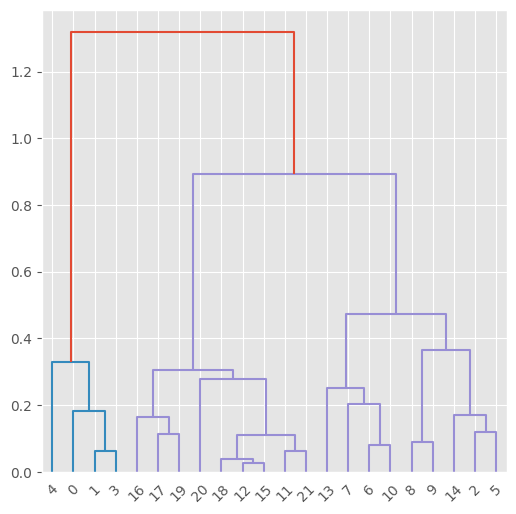

In [10]:
plt.figure(figsize=(6,6))
dendrogram(linkage_complete)

plt.show()

**Interpretation**

- distance from 2 clusters to 1 cluster = 1.32 - 0.89 = 0.43 (This is the furthest difference, meaning the optimum number of clusters is 2)
- distance from 3 clusters to 2 clusters = 0.89 - 0.47 = 0.42
- distance from 4 clusters to 3 clusters = 0.47 - 0.37 = 0.1

In [11]:
labels = fcluster(linkage_complete, 2, criterion='maxclust')
print(f'cluster : {labels}' )

cluster : [1 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


`Average`
- Calculate the average distance between data points from 2 clusters

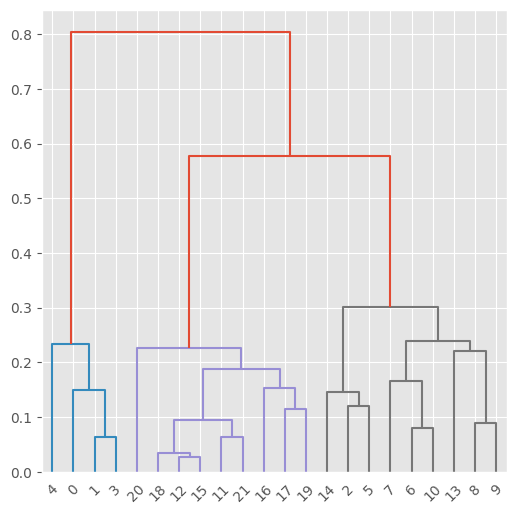

In [12]:
linkage_average = average(X_scaled)

linkage_average.round(1)

plt.figure(figsize=(6,6))
dendrogram(linkage_average)

plt.show()

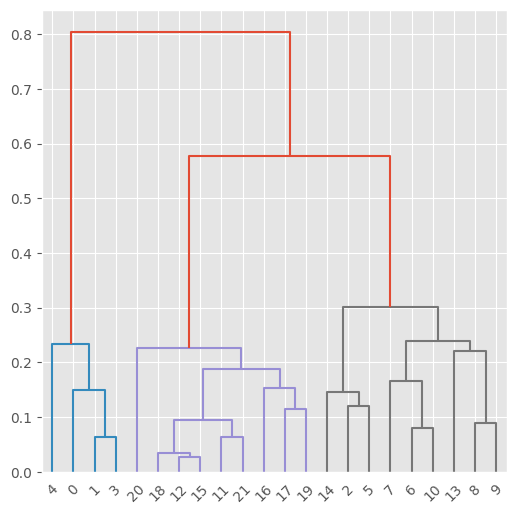

In [13]:
plt.figure(figsize=(6,6))
dendrogram(linkage_average)

plt.show()

**Interpretation**

- distance from 2 clusters to 1 cluster = 0.8 - 0.58 = 0.22
- distance from 3 clusters to 2 clusters = 0.58 - 0.3 = 0.28 (This is the farthest difference, meaning the optimum number of clusters is 3)
- distance from 4 clusters to 3 clusters = 0.3 - 0.24 = 0.6

In [14]:
labels = fcluster(linkage_average, 3, criterion='maxclust')
print(f'cluster : {labels}' )

cluster : [1 1 3 1 1 3 3 3 3 3 3 2 2 3 3 2 2 2 2 2 2 2]


#### **Building an Aglomerative Clustering using** `scikit-learn`

We initialize sklearn.cluster.AgglomerativeClustering and fit the hierarchical clustering from features or distance matrix

In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score



`Ward`

In [16]:
model_ward = AgglomerativeClustering(linkage='ward',n_clusters=3)

model_ward.fit(X_scaled)

data['clster_ward'] = model_ward.labels_
data.head()

,BodyHeight,Wife_BodyHeight,clster_ward
0,175,175,2
1,178,178,2
2,175,166,0
3,180,179,2
4,185,181,2


In [18]:
# evaluate score
score = silhouette_score(X_scaled, labels=data['clster_ward'], random_state=0)
print(f'Silhoute Score : {score:.3f}')

Silhoute Score : 0.618


`Complete`

In [19]:
model_complete = AgglomerativeClustering(linkage='complete',n_clusters=2)

model_complete.fit(X_scaled)

data['clster_complete'] = model_complete.labels_

# evaluate score
score = silhouette_score(X_scaled, labels=data['clster_complete'], random_state=0)
print(f'Silhoute Score : {score:.3f}')

data.head()

Silhoute Score : 0.499


,BodyHeight,Wife_BodyHeight,clster_ward,clster_complete
0,175,175,2,1
1,178,178,2,1
2,175,166,0,0
3,180,179,2,1
4,185,181,2,1


`Average`

In [20]:
model_average = AgglomerativeClustering(linkage='average',n_clusters=3)

model_average.fit(X_scaled)

data['clster_average'] = model_average.labels_

# evaluate score
score = silhouette_score(X_scaled, labels=data['clster_average'], random_state=0)
print(f'Silhoute Score : {score:.3f}')

data.head()

Silhoute Score : 0.618


,BodyHeight,Wife_BodyHeight,clster_ward,clster_complete,clster_average
0,175,175,2,1,1
1,178,178,2,1,1
2,175,166,0,0,0
3,180,179,2,1,1
4,185,181,2,1,1


`Determine the Optimal Number of Cluster using Silhouette Score`

In [21]:
methods = ['ward','complete','average']

number_of_clusters = range(2,10)

linkages = []
n_clusters = []
scores = []

for method in methods:
    for k in number_of_clusters :
        model = AgglomerativeClustering(linkage=method,n_clusters=k)

        labels = model.fit_predict(X_scaled)

        score = silhouette_score(X_scaled, labels, random_state=0)

        linkages.append(method)
        n_clusters.append(k)
        scores.append(score)

In [22]:
df_score = pd.DataFrame({
    'method' : linkages,
    'n_clusters' : n_clusters,
    'scores' : scores
})

pd.crosstab(
    index=df_score['method'],
    columns=df_score['n_clusters'],
    values=df_score['scores'],
    aggfunc='max'
)

n_clusters,2,3,4,5,6,7,8,9
method,,,,,,,,
average,0.498865,0.618311,0.543665,0.513395,0.468867,0.338561,0.346791,0.38213
complete,0.498865,0.618311,0.488953,0.507109,0.462056,0.361003,0.387146,0.38213
ward,0.541374,0.618311,0.543665,0.513395,0.399044,0.354516,0.373900,0.38213


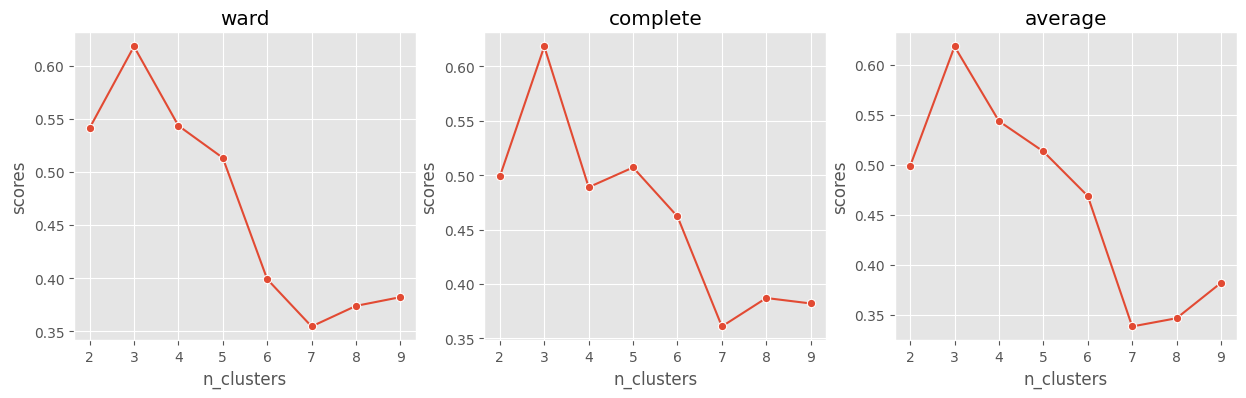

In [23]:
plt.figure(figsize=(15,4))

plot = 1
for method in methods:
    plt.subplot(1,3,plot)
    sns.lineplot(data=df_score[df_score['method']==method], x = 'n_clusters',y='scores',marker='o')
    plt.title(method)

    plot +=1

plt.show()